In [1]:
import numpy as np

In [20]:
trials=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Moniz_2017-05-15.tar/trials.intervals.npy')

In [21]:
trials

array([[ 104.80661363,  107.30014413],
       [ 107.31208408,  112.63168986],
       [ 112.63864319,  118.26681002],
       [ 118.27407005,  121.94943853],
       [ 121.95657418,  126.48229029],
       [ 126.4892264 ,  131.23029902],
       [ 131.23778333,  134.44914501],
       [ 134.45679596,  139.18013902],
       [ 139.18793124,  141.69714943],
       [ 141.70426305,  144.33214236],
       [ 144.33959498,  148.41319624],
       [ 148.42023076,  157.68085827],
       [ 157.68803196,  161.20281562],
       [ 161.20995399,  163.89660298],
       [ 163.90384308,  173.11242813],
       [ 173.1197935 ,  177.4017744 ],
       [ 177.40910687,  183.16226177],
       [ 183.16964526,  192.67227463],
       [ 192.67961344,  195.77735768],
       [ 195.78451205,  199.5945137 ],
       [ 199.60261172,  203.46060018],
       [ 203.46781674,  207.50737195],
       [ 207.51442368,  210.24377973],
       [ 210.25101712,  217.77904571],
       [ 217.78646029,  220.70918781],
       [ 220.71744763,  2

In [18]:
face=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Moniz_2017-05-15.tar/face.motionEnergy.npy' )

In [28]:
print(face.shape)

(128561, 1)


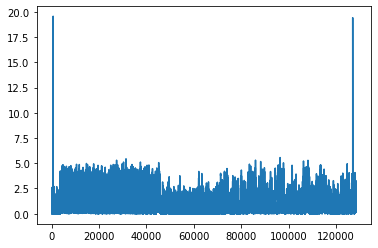

In [25]:
import matplotlib.pyplot as plt
plt.plot(face)

In [22]:
face_t=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Moniz_2017-05-15.tar/face.timestamps.npy')

In [39]:
def parse_beh_for_kmeans(trials,face,face_t):
    feat_lst=[]
    inds_lst=[]
    for j in range(0,trials.shape[0]):
        feats=[]
        inds=[]
        i=0
        for f_t in range(0,face_t.shape[0]):
            if (face_t[f_t][1] >= trials[j][0]) & (face_t[f_t][1] <= trials[j][1]):
                feats.append(face[i][0])
                inds.append(i)
            i+=1
        feat_lst.append(feats)
        inds_lst.append(inds)
    return feat_lst, inds_lst

In [40]:
feat_lst, inds_lst=parse_beh_for_kmeans(trials,face,face_t)

In [41]:
np.array(feat_lst[0]).shape

(98,)

In [54]:
def standardize_lengths_of_beh_vectors(feat_lst):
    shps_lst=[]
    for j in range(0,len(feat_lst)):
        shps_lst.append(len(feat_lst[j]))
    mn=min(shps_lst)
    st_feat_lst=[]
    for j in range(0,len(feat_lst)):
        st_feat_lst.append(feat_lst[j][:mn])
    print(mn)
    return st_feat_lst

In [55]:
st_feat_lst=standardize_lengths_of_beh_vectors(feat_lst)

84


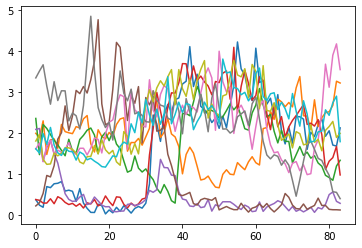

In [59]:
plt.plot(np.array(st_feat_lst)[:10].T)

In [58]:
print(np.array(st_feat_lst).shape)

(247, 84)


In [63]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pcs=pca.fit_transform(np.array(st_feat_lst))
print(pcs.shape)

(247, 2)


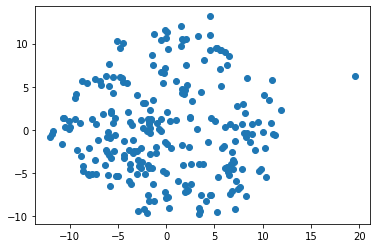

In [64]:
plt.scatter(pcs[:,0],pcs[:,1])

In [65]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(st_feat_lst)
labs=kmeans.labels_

In [66]:
labs

array([1, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 1, 2, 1, 1, 3,
       1, 0, 1, 2, 3, 1, 2, 1, 0, 0, 3, 2, 1, 1, 0, 1, 1, 1, 3, 3, 1, 0,
       1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 2, 1, 0, 0, 3, 2, 2, 1, 0, 1, 3, 3, 2, 3, 2, 3, 1, 0, 3,
       3, 0, 2, 3, 3, 3, 1, 0, 2, 1, 0, 1, 1, 0, 2, 3, 3, 2, 1, 1, 1, 3,
       3, 3, 3, 2, 2, 1, 0, 3, 2, 1, 0, 2, 3, 2, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 3, 3, 0, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 0, 2, 2, 1, 2, 2,
       3, 3, 3, 3, 0, 1, 2, 2, 3, 3, 1, 2, 1, 3, 1, 2, 1, 0, 3, 2, 3, 3,
       3, 0, 3, 3, 2, 3, 0, 3, 2, 0, 3, 3, 2, 2, 2, 2, 2, 0, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 1, 0, 1, 3, 2, 2, 0, 2, 0, 3, 2, 2, 1, 3, 3, 1, 3,
       3, 1, 2, 0, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

(array([49.,  0.,  0., 64.,  0.,  0., 56.,  0.,  0., 78.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

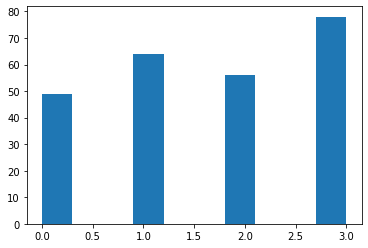

In [67]:
plt.hist(labs)

In [68]:
np.save('labels.npy',labs)